In [18]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Загрузка данных

In [2]:
df = pd.read_csv('sales.csv')
df.head()

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal


### Изучение данных

(1460, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB
None


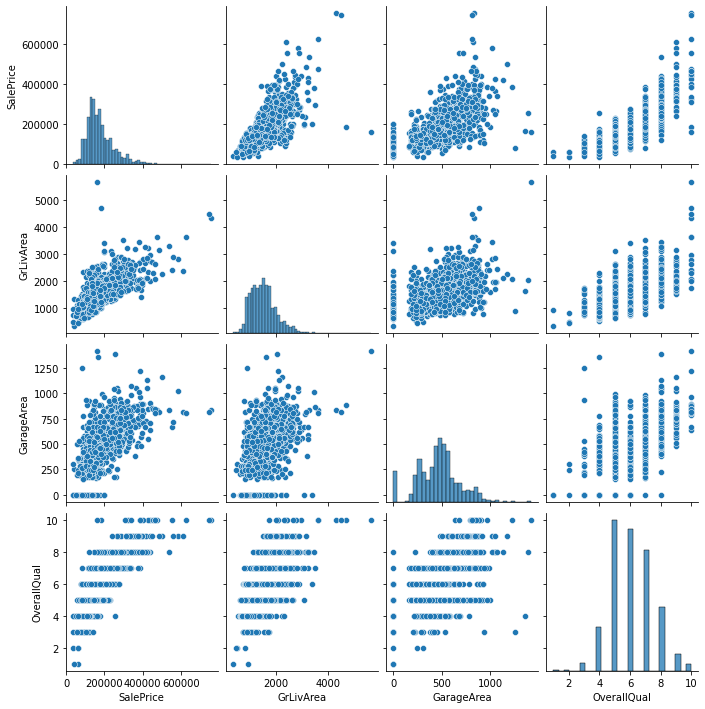

In [19]:
print(df.shape)
print(df.info())
sns.pairplot(data=df)

In [4]:
def remove_ountl(df):
    df_outl = df.copy()
    
    def outliers(df):
        q25 = df.quantile(0.25)
        q75 = df.quantile(0.75)
        iqr = q75-q25
        boundaries = (q25 - 1.5*iqr, q75 + 1.5*iqr)
        return boundaries
    
    for elem in df.columns.tolist()[:4]:
        boundaries = outliers(df_outl[elem])
        df_outl.loc[df_outl[elem] < boundaries[0], elem] = boundaries[0]
        df_outl.loc[df_outl[elem] > boundaries[1], elem] = boundaries[1]
        return df_outl

df_outliers = remove_ountl(df)

C:\Users\bogho\AppData\Local\Temp\ipykernel_2500\1884657838.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3937.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_outl.loc[df_outl[elem] < boundaries[0], elem] = boundaries[0]


In [5]:
df_outliers.describe()

,SalePrice,GrLivArea,GarageArea,OverallQual
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,177331.526370,1515.463699,472.980137,6.099315
std,67205.835915,525.480383,213.804841,1.382997
min,34900.000000,334.000000,0.000000,1.000000
25%,129975.000000,1129.500000,334.500000,5.000000
50%,163000.000000,1464.000000,480.000000,6.000000
75%,214000.000000,1776.750000,576.000000,7.000000
max,340037.500000,5642.000000,1418.000000,10.000000


In [6]:
df_outliers.iloc[:, :4].corr()

,SalePrice,GrLivArea,GarageArea,OverallQual
SalePrice,1.000000,0.699980,0.650429,0.816856
GrLivArea,0.699980,1.000000,0.468997,0.593007
GarageArea,0.650429,0.468997,1.000000,0.562022
OverallQual,0.816856,0.593007,0.562022,1.000000


In [7]:
df_columns = df_outliers.drop('OverallQual', axis=1)
df_columns.head()

,SalePrice,GrLivArea,GarageArea,Street,SaleCondition
0,208500.0,1710,548,Pave,Normal
1,181500.0,1262,460,Pave,Normal
2,223500.0,1786,608,Pave,Normal
3,140000.0,1717,642,Pave,Abnorml
4,250000.0,2198,836,Pave,Normal


In [8]:
 df_columns.iloc[:,:3]

,SalePrice,GrLivArea,GarageArea
0,208500.0,1710,548
1,181500.0,1262,460
2,223500.0,1786,608
3,140000.0,1717,642
4,250000.0,2198,836
...,...,...,...
1455,175000.0,1647,460
1456,210000.0,2073,500
1457,266500.0,2340,252
1458,142125.0,1078,240


In [9]:
def scaler(df):
    df_scaled = df.copy()
      
    df_scaled.iloc[:,:3] = StandardScaler().fit_transform(df_scaled.iloc[:,:3])
    return df_scaled

df_scaled = scaler(df_columns)
df_scaled

C:\Users\bogho\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\bogho\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


,SalePrice,GrLivArea,GarageArea,Street,SaleCondition
0,0.463935,0.370333,0.351000,Pave,Normal
1,0.062047,-0.482512,-0.060731,Pave,Normal
2,0.687207,0.515013,0.631726,Pave,Normal
3,-0.555671,0.383659,0.790804,Pave,Abnorml
4,1.081653,1.299326,1.698485,Pave,Normal
...,...,...,...,...,...
1455,-0.034704,0.250402,-0.060731,Pave,Normal
1456,0.486262,1.061367,0.126420,Pave,Normal
1457,1.327251,1.569647,-1.033914,Pave,Normal
1458,-0.524041,-0.832788,-1.090059,Pave,Normal


In [10]:
#dummies
df_dum = pd.get_dummies(df_scaled, columns=["Street", "SaleCondition"], prefix=["Street", "Condition"], drop_first= True, dtype=int)
df_dum.head()

,SalePrice,GrLivArea,GarageArea,Street_Pave,Condition_AdjLand,Condition_Alloca,Condition_Family,Condition_Normal,Condition_Partial
0,0.463935,0.370333,0.351000,1,0,0,0,1,0
1,0.062047,-0.482512,-0.060731,1,0,0,0,1,0
2,0.687207,0.515013,0.631726,1,0,0,0,1,0
3,-0.555671,0.383659,0.790804,1,0,0,0,0,0
4,1.081653,1.299326,1.698485,1,0,0,0,1,0


In [11]:
df_dum.corr()

,SalePrice,GrLivArea,GarageArea,Street_Pave,Condition_AdjLand,Condition_Alloca,Condition_Family,Condition_Normal,Condition_Partial
SalePrice,1.000000,0.699980,0.650429,0.045075,-0.057114,-0.015641,-0.048646,-0.127966,0.339549
GrLivArea,0.699980,1.000000,0.468997,0.044121,-0.040208,0.032283,-0.007743,-0.091572,0.163239
GarageArea,0.650429,0.468997,1.000000,-0.047794,-0.101277,-0.005458,-0.016173,-0.130874,0.294714
Street_Pave,0.045075,0.044121,-0.047794,1.000000,0.003367,-0.112734,0.007571,-0.002140,0.019657
Condition_AdjLand,-0.057114,-0.040208,-0.101277,0.003367,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
Condition_Alloca,-0.015641,0.032283,-0.005458,-0.112734,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
Condition_Family,-0.048646,-0.007743,-0.016173,0.007571,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
Condition_Normal,-0.127966,-0.091572,-0.130874,-0.002140,-0.112080,-0.194663,-0.252006,1.000000,-0.654323
Condition_Partial,0.339549,0.163239,0.294714,0.019657,-0.016038,-0.027856,-0.036062,-0.654323,1.000000


### Моделирование

In [12]:
features_n = df_dum.columns.tolist()[1:]
train, test = train_test_split(df_dum, train_size=0.7, random_state=24)

In [13]:
model = LinearRegression()
model.fit(train[features_n], train['SalePrice'])

print('коэффициенты модели:', model.coef_, sep = '\n')
print('смещение модели:',model.intercept_, sep = '\n')

C:\Users\bogho\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


коэффициенты модели:
[0.47665438 0.39445809 0.290688   0.16820998 0.00118536 0.04564656
 0.27435744 0.70358426]
смещение модели:
-0.5609968264763088


In [14]:
train_predict = model.predict(train[features_n])
test_predict = model.predict(test[features_n])

C:\Users\bogho\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\bogho\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


### Проверка предсказаний

In [15]:
train_mae = mean_absolute_error(train_predict, train['SalePrice'])
test_mae = mean_absolute_error(test_predict, test['SalePrice'])

print('train mae: {}'.format(train_mae))
print('test mae: {}'.format(test_mae))

train mae: 0.43045715214004215
test mae: 0.3984938892253529


In [16]:
train_mse = mean_squared_error(train_predict, train['SalePrice'])
test_mse = mean_squared_error(test_predict, test['SalePrice'])

print('train mse: {}'.format(train_mse))
print('test mse: {}'.format(test_mse))

train mse: 0.3795348263602995
test mse: 0.2813657933466941


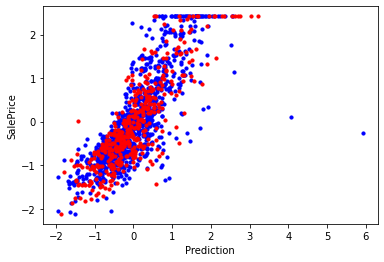

In [20]:
plt.scatter(train_predict, train['SalePrice'], s=10, c='b')
plt.scatter(test_predict, test['SalePrice'], s=10, c='r')
plt.xlabel('Prediction')
plt.ylabel('SalePrice')
plt.show();